In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
# import scipy.optimize as optimize
from datetime import datetime
import random

pd.set_option('display.max_columns', None)
# pd.options.display.float_format = '{:.6f}'.format

path = 'data/'

In [2]:
ticklers_list = ['^IRX', '^FVX', '^TNX', '^TYX']

In [3]:
files_list = []

for ticker in ticklers_list:
    t = yf.Ticker(ticker)
    temp_df = t.history(period='max')
    print(ticker, 'shape:', temp_df.shape )
    
    rnd_nro = str(random.randint(100,999))
    time_code = datetime.today().strftime('%Y%m%d_%H%M')
    file_name = time_code + '_' + ticker + '_' + rnd_nro + '.pkl'
    temp_df.to_pickle(path + file_name)
    files_list.append(file_name)
    print(file_name)

^IRX shape: (15862, 7)
20230526_1642_^IRX_265.pkl
^FVX shape: (15363, 7)
20230526_1642_^FVX_227.pkl
^TNX shape: (15363, 7)
20230526_1642_^TNX_321.pkl
^TYX shape: (11593, 7)
20230526_1642_^TYX_755.pkl


In [4]:
files_list

['20230526_1642_^IRX_265.pkl',
 '20230526_1642_^FVX_227.pkl',
 '20230526_1642_^TNX_321.pkl',
 '20230526_1642_^TYX_755.pkl']

In [5]:
df = pd.DataFrame()
all_cols = []

for file in files_list:
    tick = file[15:18]
    temp_df = pd.read_pickle(path + file)
    temp_df.columns = [col + "_" + tick for col in temp_df.columns]
    all_cols.append(temp_df.columns.tolist())
    df = pd.concat([df, temp_df], axis=1)
    
df.shape

(15862, 28)

In [6]:
df

,Open_IRX,High_IRX,Low_IRX,Close_IRX,Volume_IRX,Dividends_IRX,Stock Splits_IRX,Open_FVX,High_FVX,Low_FVX,Close_FVX,Volume_FVX,Dividends_FVX,Stock Splits_FVX,Open_TNX,High_TNX,Low_TNX,Close_TNX,Volume_TNX,Dividends_TNX,Stock Splits_TNX,Open_TYX,High_TYX,Low_TYX,Close_TYX,Volume_TYX,Dividends_TYX,Stock Splits_TYX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-04,4.520,4.520,4.520,4.520,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,4.550,4.550,4.550,4.550,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-06,4.680,4.680,4.680,4.680,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-07,4.630,4.630,4.630,4.630,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-08,4.590,4.590,4.590,4.590,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,5.098,5.120,5.063,5.095,0,0,0,3.739,3.787,3.718,3.767,0.0,0.0,0.0,3.690,3.728,3.665,3.719,0.0,0.0,0.0,3.948,3.973,3.919,3.970,0.0,0.0,0.0
2023-05-23,5.205,5.220,5.150,5.153,0,0,0,3.808,3.826,3.739,3.748,0.0,0.0,0.0,3.744,3.761,3.688,3.698,0.0,0.0,0.0,3.986,4.003,3.942,3.951,0.0,0.0,0.0
2023-05-24,5.150,5.198,5.000,5.185,0,0,0,3.734,3.822,3.734,3.782,0.0,0.0,0.0,3.673,3.742,3.673,3.719,0.0,0.0,0.0,3.921,3.978,3.920,3.965,0.0,0.0,0.0


In [7]:
all_cols = [element for sublist in all_cols for element in sublist]
closes = [col for col in all_cols if col[:5]=='Close']
closes

['Close_IRX', 'Close_FVX', 'Close_TNX', 'Close_TYX']

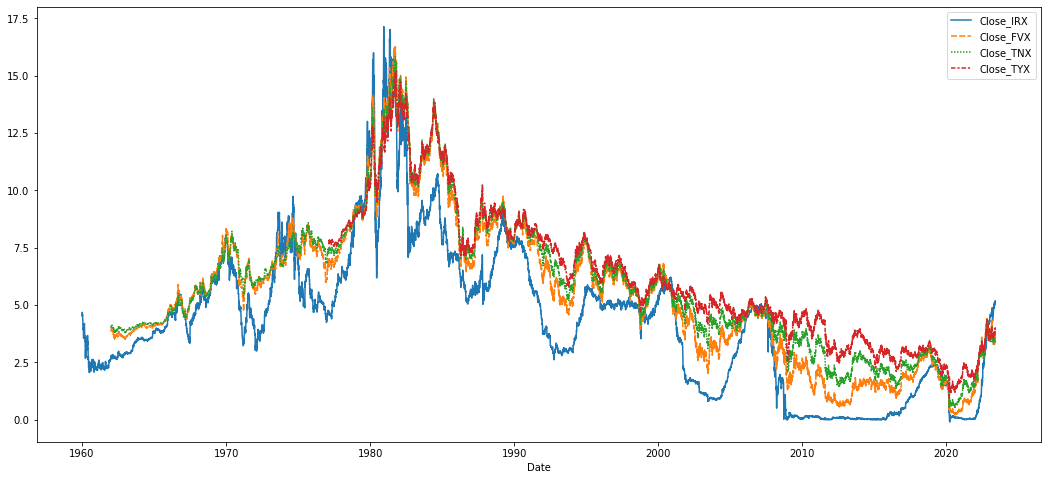

In [8]:
df_plot = df[closes]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot);

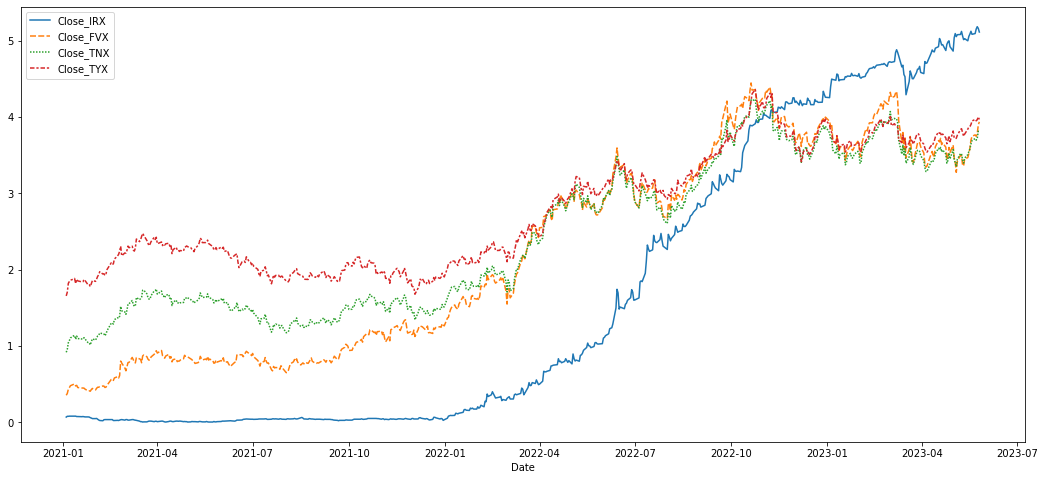

In [9]:
df_plot = df[df.index>'2021'][closes]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot);

---

In [10]:
for t in closes:
    df['ratio_1day' + t[-4:]] = round((df[t] - df[t].shift(1)) / df[t].shift(1) * 100, 4)
    df['ratio_7days' + t[-4:]] = round((df[t] - df[t].shift(7)) / df[t].shift(7) * 100, 4)
    
df

,Open_IRX,High_IRX,Low_IRX,Close_IRX,Volume_IRX,Dividends_IRX,Stock Splits_IRX,Open_FVX,High_FVX,Low_FVX,Close_FVX,Volume_FVX,Dividends_FVX,Stock Splits_FVX,Open_TNX,High_TNX,Low_TNX,Close_TNX,Volume_TNX,Dividends_TNX,Stock Splits_TNX,Open_TYX,High_TYX,Low_TYX,Close_TYX,Volume_TYX,Dividends_TYX,Stock Splits_TYX,ratio_1day_IRX,ratio_7days_IRX,ratio_1day_FVX,ratio_7days_FVX,ratio_1day_TNX,ratio_7days_TNX,ratio_1day_TYX,ratio_7days_TYX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-04,4.520,4.520,4.520,4.520,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,4.550,4.550,4.550,4.550,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-06,4.680,4.680,4.680,4.680,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-07,4.630,4.630,4.630,4.630,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-08,4.590,4.590,4.590,4.590,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,5.098,5.120,5.063,5.095,0,0,0,3.739,3.787,3.718,3.767,0.0,0.0,0.0,3.690,3.728,3.665,3.719,0.0,0.0,0.0,3.948,3.973,3.919,3.970,0.0,0.0,0.0,0.1967,1.5952,0.5069,12.1465,0.7313,9.4790,0.5572,5.9232
2023-05-23,5.205,5.220,5.150,5.153,0,0,0,3.808,3.826,3.739,3.748,0.0,0.0,0.0,3.744,3.761,3.688,3.698,0.0,0.0,0.0,3.986,4.003,3.942,3.951,0.0,0.0,0.0,1.1384,2.4861,-0.5044,8.6062,-0.5647,6.7860,-0.4786,4.6068
2023-05-24,5.150,5.198,5.000,5.185,0,0,0,3.734,3.822,3.734,3.782,0.0,0.0,0.0,3.673,3.742,3.673,3.719,0.0,0.0,0.0,3.921,3.978,3.920,3.965,0.0,0.0,0.0,0.6210,3.7000,0.9072,9.0228,0.5679,6.0148,0.3543,3.2015


In [11]:
ratios_1d = ['ratio_1day' + x[-4:] for x in closes]
ratios_7d = ['ratio_7days' + x[-4:] for x in closes]

In [12]:
df[ratios_1d].sample(5)

,ratio_1day_IRX,ratio_1day_FVX,ratio_1day_TNX,ratio_1day_TYX
Date,,,,
1962-05-14,0.3802,0.5540,0.7853,NaN
2012-04-05,0.0000,-4.1905,-3.0317,-1.7160
2001-02-15,0.2028,1.4709,1.4300,0.9012
1966-09-08,0.3854,-0.1805,-0.3846,NaN
2005-07-18,0.0629,1.0309,1.1497,1.4075


In [13]:
df[ratios_7d].sample(5)

,ratio_7days_IRX,ratio_7days_FVX,ratio_7days_TNX,ratio_7days_TYX
Date,,,,
2005-12-30,2.5212,-0.9777,-1.5898,-2.3830
1998-12-18,1.6241,0.6679,0.5057,0.9270
2007-06-25,2.8825,-3.8223,-2.6644,-1.8329
1995-12-13,-0.9416,2.5115,2.0292,0.8988
1983-12-16,1.7877,0.8703,0.7634,0.9298


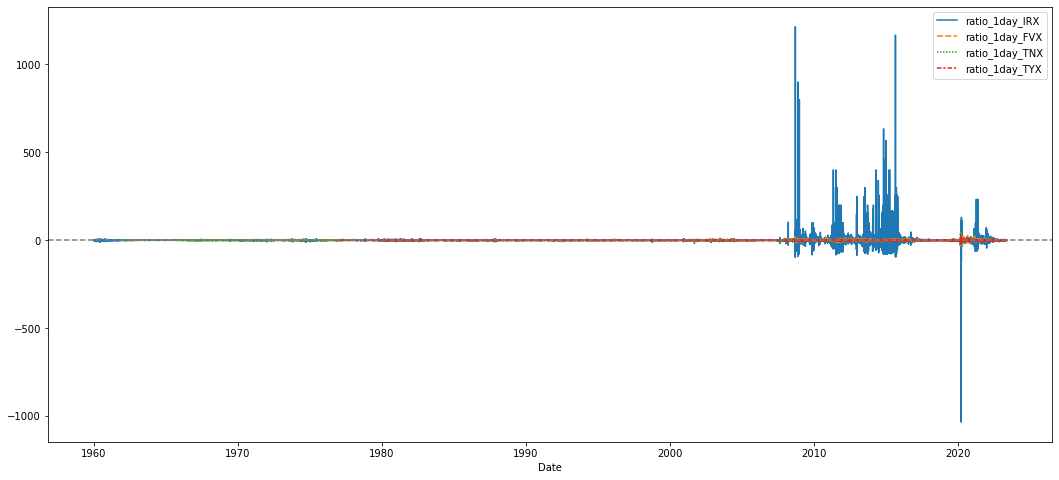

In [14]:
df_plot = df[ratios_1d]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot);
plt.axhline(y=0, color='gray', linestyle='--')
plt.show();

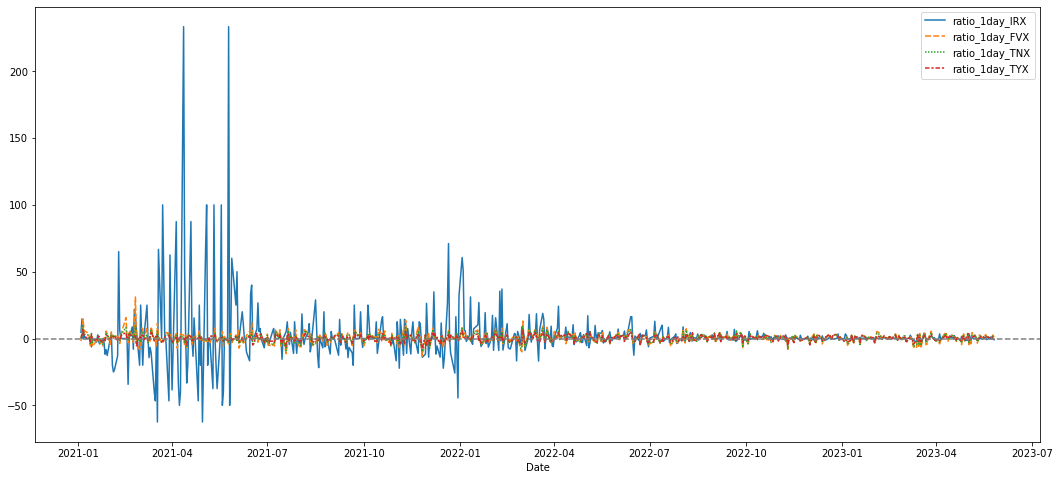

In [17]:
df_plot = df_plot = df[df.index>'2021'][ratios_1d]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show();

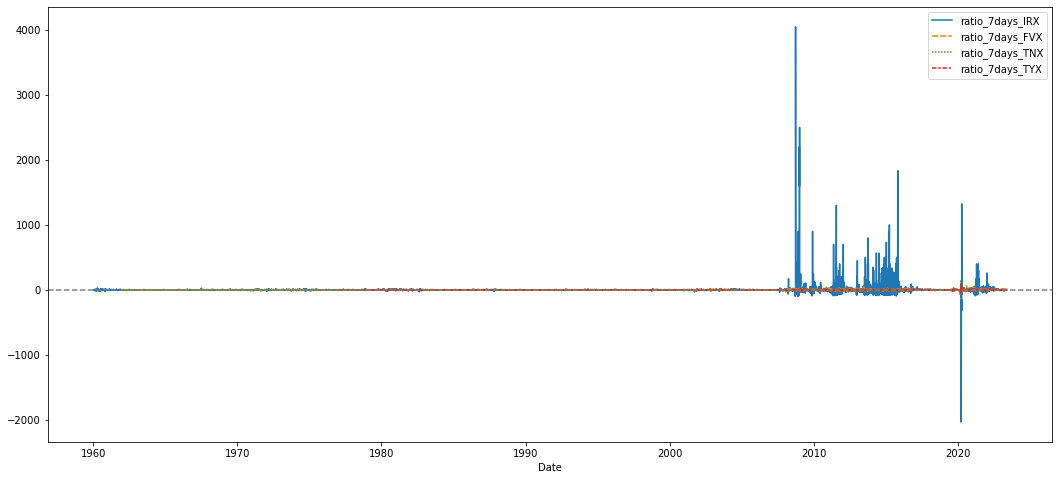

In [18]:
df_plot = df[ratios_7d]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot);
plt.axhline(y=0, color='gray', linestyle='--')
plt.show();

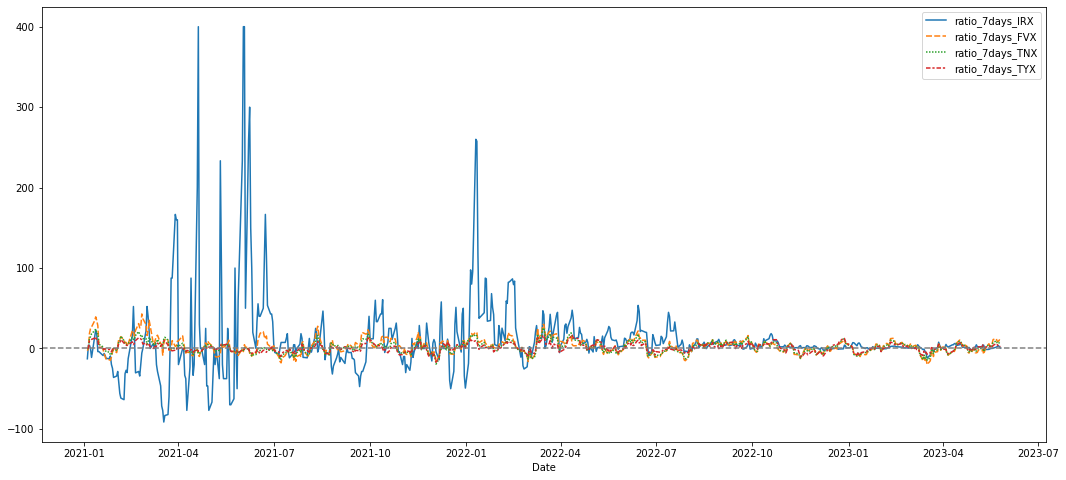

In [19]:
df_plot = df_plot = df[df.index>'2021'][ratios_7d]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show();

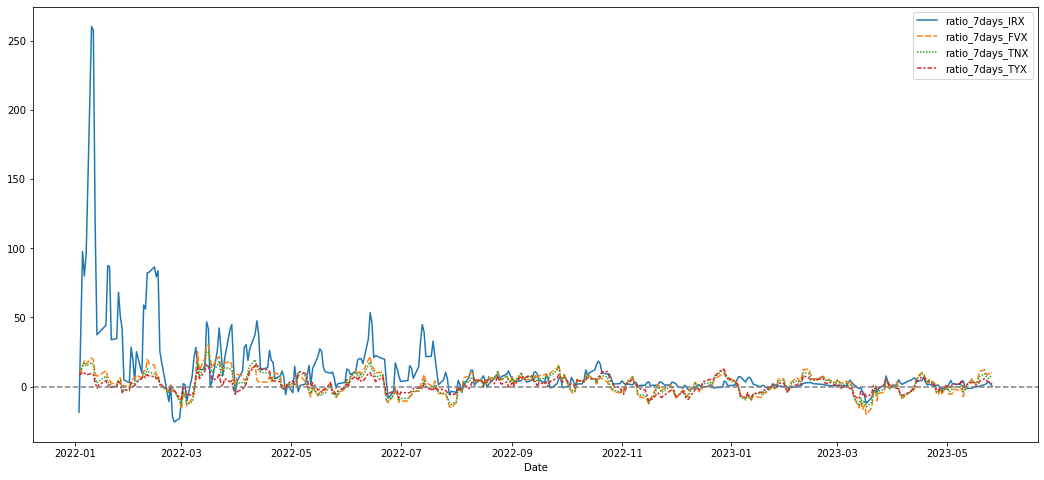

In [20]:
df_plot = df_plot = df[df.index>'2022'][ratios_7d]
plt.figure(figsize=(18,8))
sns.lineplot(data=df_plot)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show();